# TP3 -  Zipf's Law and and Precision/Recall  (16/04/2023)

## 1 Goal

### 1.1 Zipf's Law

<font size="3">

In the first part of this exercise we study the statistics of word occurrences in texts. An observation made by George Kingsley Zipf (1902-1950) states that, in general:
<ul>
    <li> A small number of words occur very frequently </li>
    <li> Many words occur rarely </li>
</ul>
More formally, the above Zipf's law states that the <i>probability</i> of encountering the r-th most common word is inversely proportional to its rank $r$, that is,
    
\begin{equation}
P(r) \approx 0.1/r.
\end{equation}
    
For example, according to the above equation, the most frequently occurred word $w_1$ with $r=1$ has a probability of $P(1)\approx0.1$, meaning that roughly one of every ten words is $w_1$. The second most frequent word has a probability
$P(2)\approx0.05$, meaning that one of every twenty word is $w_2$, and so on.
    
</font>

### Terminologies

<font size="3">
    <ul>
        <li><b>Frequency (f)</b>: number of occurrences of a word in a text</li>
        <li><b>Corpus</b>: a collection of documents of a particular kind</li>
        <li><b>Rank of a word (r)</b>: a word's ordinal number in a list sorted by decreasing frequency (f)</li>
        <li><b>Vocabulary</b>: set of all unique words in a corpus</li>
    </ul>
</font>

### 1.2 Search engine evaluation

<font size="3">

In the previous lab, you built search engines able to rank documents $d_j$ according to their relevance $r_j$ w.r.t a query.
The aim here is that you build the evaluation framework for assessing the quality of the retrieval.

For this you need a ranked list (permutation of the index list of the documents $\{1,...,N\}$) and a relevance list  (list of $N$ binary values indicating if document $d_j$ is relevant ($r_j=1$) or not ($r_j=0$)).

Precision wll assess the density of relevant documents when exploring the ranked list downwards.
Recall indicates the proportion of relevant documents retrieved so far (among all relevant documents).

At one step $n$ of such a scrolling of the ranked list one may place the threshold "positive above, negative below" and compute the related $P_n$ and $R_n$ value and therefore plot one $(R_n,P_n)$ point of the P-R curve (for one query).
    
</font>

## 2. List of tasks

### 2.1 Evaluate your search engine

<font size="3">
Your task here is to build functions computing and plotting the P-R curves in several settings.
You may use:
    
<ul>
    <li>$N=10$, the ranked list is $\{2,4,5,3,6,1,7,8,0,9\}$ and the relevant list is $\{1,1,1,1,0,1,0,0,0,0\}$ (you may also make up your own data - including perfect ranking)</li>
    <li> Random or manual: Choose $N$, generate a binary list, generate several permutations.</li>
    <li>Based on your previous labs using <b>nasa</b> data, generate ranking for queries <b>"engine"</b> and <b>"analysis"</b>. For the relevance set use the command <code>grep -i <query> *.key</code> to select the relevant documents.</li>
</ul>
    
<ol>
    <li>Create a function taking as input the ranked and relevance lists, level $n$ and providing you with $(R_n,p_n)$.</li> 
    <li>Given 2 queries (any data above), plot the P-R curves.</li>
    <li>Average these two P-R curves using the 11-point technique.</li>
    <li>(optional) Compute nDCG on the above (see Learning to Rank). Discuss nDCG against P-R.</li>
    <li>(optional) Compute the mAP for the above queries.</li>
    <li>(optional) Get more queries as above and use micro and macro-averaging techniques.</li>
    <li>(optional) Create functions providing you with the Spearman correlation and Kendall Tau between the above lists.</li>
</ol>
    
</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:


def recall_precision(docs_rankings:list , docs_relevant:list, n:int) -> tuple:
    if n > len(docs_rankings) or n < 1:
        raise ValueError(f"Invalid level n. It should be between 1 and {len(docs_rankings)}")
    
    # Slice the lists up to level n
    ranked_list_n = docs_rankings[:n]
    relevant_list_n = [docs_relevant[i] for i in ranked_list_n]

    # Calculate the number of True Positives (TP) and False Positives (FP)
    TP = sum(relevant_list_n)
    FP = n - TP

    # Calculate recall and precision at level n
    recall_n = TP / sum(docs_relevant)
    precision_n = TP / (TP + FP)

    return precision_n, recall_n



In [3]:
N = 10
docs_rankings1 = [2,4,5,3,6,1,7,8,0,9]
docs_relevant1 = [1,1,1,1,0,1,0,0,0,0]
p_r = [recall_precision(docs_rankings1, docs_relevant1, _) for _ in range(1, N+1)]
p,r = zip(*p_r)
p1,r1 = list(p), list(r)
print(f"precision: {p1}")
print(f"recall: {r1}")

precision: [1.0, 0.5, 0.6666666666666666, 0.75, 0.6, 0.6666666666666666, 0.5714285714285714, 0.5, 0.5555555555555556, 0.5]
recall: [0.2, 0.2, 0.4, 0.6, 0.6, 0.8, 0.8, 0.8, 1.0, 1.0]


In [18]:
#  random list between 0 and 9
docs_rankings2 = np.random.permutation(10)
docs_relevant2 = np.random.randint(2, size=10)

print(f"docs_rankings2: {docs_rankings2}")
print(f"docs_relevant2: {docs_relevant2}")

p2,r2 = zip(*[recall_precision(docs_rankings2, docs_relevant2, _) for _ in range(1, N+1)])
p2,r2 = list(p2), list(r2)

print(f"precision: {p2}")
print(f"recall: {r2}")

docs_rankings2: [0 4 9 5 8 2 6 7 1 3]
docs_relevant2: [1 1 1 0 0 1 1 0 0 0]
precision: [1.0, 0.5, 0.3333333333333333, 0.5, 0.4, 0.5, 0.5714285714285714, 0.5, 0.5555555555555556, 0.5]
recall: [0.2, 0.2, 0.2, 0.4, 0.4, 0.6, 0.8, 0.8, 1.0, 1.0]


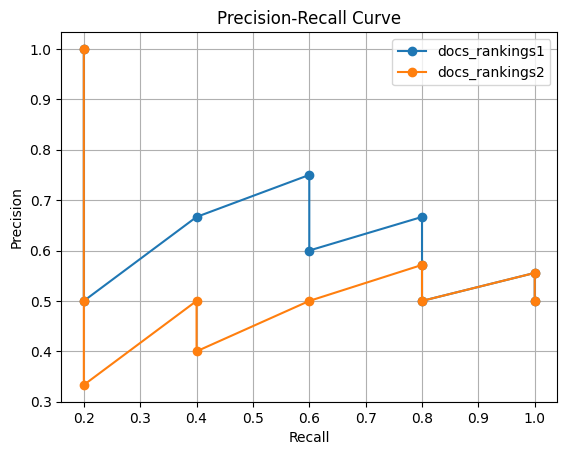

In [19]:
plt.figure()
plt.plot(r1, p1, marker='o', label='docs_rankings1')
plt.plot(r2, p2, marker='o', label='docs_rankings2')
plt.title("Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()


#### Average p,r curves with 11 point technique

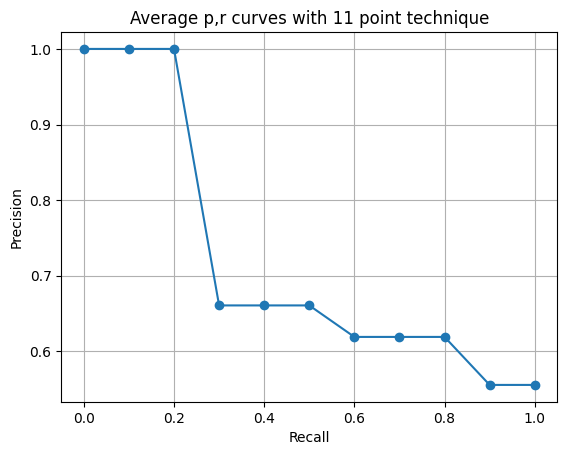

In [32]:
import numpy as np

def interpolate_precision_recall(precision, recall):
    """
     Interpolates the precision and recall values to a range of 0 - 11. This is useful for plotting the accuracy of an experiment
     
     Args:
     	 precision: A 2D NumPy array of shape [ n_samples ]
     	 recall: A 2D NumPy array of shape [ n_samples ]
     
     Returns: 
     	 A tuple of 2 arrays of shape [ n_samples n_levels ] where n_levels is the number of levels in the
    """
    recall_levels = np.linspace(0, 1, 11)
    interpolated_precision = []

    # The precision values for each recall level.
    for r in recall_levels:
        precision_values = precision[recall >= r]
        # Add the precision values to the interpolated precision array.
        if precision_values.size > 0:
            interpolated_precision.append(np.max(precision_values))
        else:
            interpolated_precision.append(0)

    return np.array(interpolated_precision), recall_levels

p1,r1,p2,r2 = np.array(p1), np.array(r1), np.array(p2), np.array(r2)

interp_precision1, recall_levels = interpolate_precision_recall(p1, r1)
interp_precision2, recall_levels = interpolate_precision_recall(p2, r2)

average_precision = (interp_precision1 + interp_precision2) / 2

plt.figure()
# plt.plot(recall_levels,interp_precision1, marker='o', label='docs_rankings1')
# plt.plot(recall_levels,interp_precision2, marker='o', label='docs_rankings2')
plt.plot(recall_levels,average_precision, marker='o')
plt.title("Average p,r curves with 11 point technique")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()


### 2.2 Verify the Zipf's Law

<font size="3">
<ol>
    <li>Choose one or more French books as your corpus from the <a href="http://www.gutenberg.org/" target="_blank">project Guttenberg web site</a>, for example  
        <ul> 
            <li><a href="http://www.gutenberg.org/ebooks/5097" target="_blank">20000 Lieues Sous Les Mers</a></li>
            <li><a href="http://www.gutenberg.org/ebooks/13951" target="_blank">Les Trois Mousquetaires</a></li>
            <li><a href="http://www.gutenberg.org/ebooks/5423" target="_blank">L'homme Qui Rit</a></li>
            <li><a href="http://www.gutenberg.org/ebooks/14286" target="_blank">L'Odyssée</a></li>
            <li><a href="http://www.gutenberg.org/ebooks/9945" target="_blank">Histoire de la Révolution française</a></li>
        </ul> <br>
    <li>Verify the Zipf's Law. For this you need to:
        <ul> 
            <li>Identify all unique words in your corpus. One way to do this is to tokenize your corpus by splitting based on white space characters. If a token match a predefined regular expression, then memorize it as a valid word. This is for filtering non-word tokens like <code>****</code>, <code>---</code>, etc.</li>
            <li>Count the frequencies of all words in your corpus and arranges them in a list according to their rank. You may program in <code>Python, Matlab, Perl</code>, etc.</li>
            <li>Transform the frequencies into probabilities by normalizing each frequency using the total number of words in your corpus. On the same diagram, plot the obtained probabilities against their ranks, the theoretical relationship according to the formula of Zipf's law and a linear regression (least-squares fit) line. Please report  the values of R-squared, p-value and attach a residual plot for the linear regression. Justify whether linear regression models can be used to explore the dependence between words' probabilities and their ranks. Comment on how the approximation fits the theoretical formula.</li>
        </ul>
    </li> <br>
    <li>From the data you obtained, find 10 examples of extremely frequent, very rare, and averagely frequent words to fill out the following table
        <table>
            <tr>
                <th> </th>
                <th>Very Frequent Words</th>
                <th>Averagely Frequent Words</th>
                <th> Very Rare Words</th>
            </tr>
            <tr>
                <td>1</td> 
                <td></td> 
                <td></td>
                <td></td>
            </tr>
            <tr>
                <td>2</td> 
                <td></td> 
                <td></td>
                <td></td>
            </tr>
            <tr>
                <td>...</td> 
                <td></td> 
                <td></td>
                <td></td>
            <tr>
                <td>10</td> 
                <td></td> 
                <td></td>
                <td></td>
            </tr>
        </table>
Intuitively, which of the above three word categories could be more useful in information retrieval? Which of these categories is likely to have large tf-idf values? Why? </li>
</ol>
</font>

In [70]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load the NLTK stop words 
# nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

def clean_raw_text(doc):
    
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    digits = '0123456789'
    
    for sent_num, sent in enumerate(doc):
        # Lowercase
        sent = sent.lower()
        
        # Removing the punctuations and numbers
        sent = "".join([char for char in sent if char not in punctuations + digits])
        doc[sent_num] = sent
            
    return doc

def preprocess(fname, remove_stop_words=True,stemming=False):
    
    with open(fname, 'r',encoding='utf-8') as f:
        corpus = f.readlines()
    print(len(corpus))
    
    # Clean raw text
    cleaned_doc = clean_raw_text(corpus)

    # Tokenize documents
    tokenized_doc = [nltk.word_tokenize(sent) for sent in cleaned_doc]

    # Stemming
    if stemming:
        ps = PorterStemmer()
        stemmed_doc = [ps.stem(token) for sent in tokenized_doc for token in sent]
    
    if remove_stop_words and stemming:
        pre_processed_doc = [token for token in stemmed_doc if token not in stop_words]
    elif remove_stop_words and not stemming:
        pre_processed_doc = [token for sent in tokenized_doc for token in sent if token not in stop_words]
        
    # pre_processed_doc = [word for sentence in pre_processed_doc for word in sentence if len(sentence) > 0]
        
    return pre_processed_doc

In [71]:
# pg9945.txt is a text file containing the contents of "Histoire de la Révolution Française"
tokenized_doc = preprocess('./pg9945.txt', remove_stop_words=True,stemming=False)

9509


In [75]:
print(len(tokenized_doc))

56067


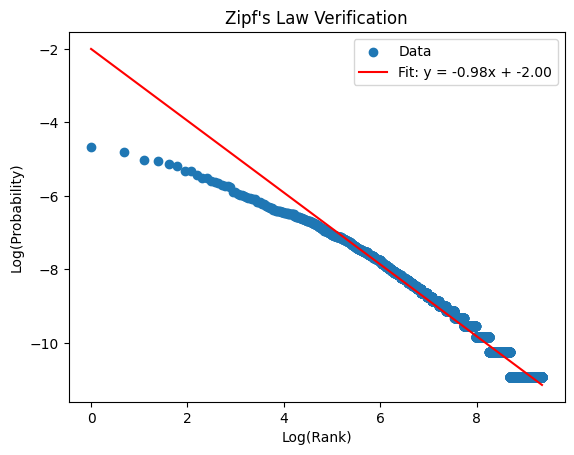

R-squared: 0.9648
p-value: 0.0000


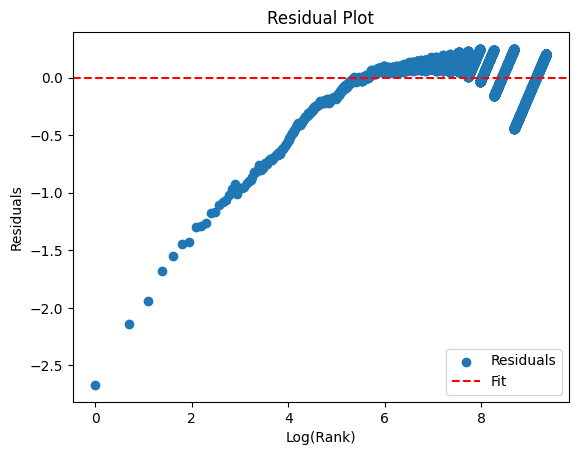

In [81]:
from collections import Counter
from scipy.stats import linregress


# CHATGPT LOL
# Count the frequencies of all unique words
word_freq = Counter(tokenized_doc)

# Sort the words by frequency and assign ranks
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
ranked_words = [(i + 1, w, f) for i, (w, f) in enumerate(sorted_words)]

# Calculate probabilities
total_words = sum(word_freq.values())
word_prob = [(r, w, f / total_words) for (r, w, f) in ranked_words] 

# Create a DataFrame
df = pd.DataFrame(word_prob, columns=["Rank", "Word", "Probability"])

# Apply a log transformation to the ranks and probabilities
df["Log_Rank"] = np.log(df["Rank"])
df["Log_Probability"] = np.log(df["Probability"])

# checker resultat sans log (on voit rien)
# df["Log_Rank"] = df["Rank"]
# df["Log_Probability"] = df["Probability"]

# Perform linear regression
result = linregress(df["Log_Rank"], df["Log_Probability"])
slope, intercept, r_value, p_value, std_err = result

# Plot the data and the linear regression line
plt.scatter(df["Log_Rank"], df["Log_Probability"], label="Data")
plt.plot(
    df["Log_Rank"],
    intercept + slope * df["Log_Rank"],
    color="red",
    label=f"Fit: y = {slope:.2f}x + {intercept:.2f}",
)
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Probability)")
plt.legend()
plt.title("Zipf's Law Verification")
plt.show()

# Print the R-squared, p-value, and residual plot
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

plt.scatter(df["Log_Rank"], df["Log_Probability"] - (intercept + slope * df["Log_Rank"]),label="Residuals")
plt.axhline(0, color="red", linestyle="--",label="Fit")
plt.xlabel("Log(Rank)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

## 3 Assessment

<font size="3">

The assessment is based on your report. Your PDF report should include all experimental results, your answers to all questions, and your analysis and comments of the experimental results. It should be around $4$ pages for this assignment. Please try to detail the report by giving examples and conclusions. Please archive your report and codes in "PrenomNomTP1.zip", and upload to <a href="http://moodle.unige.ch" target="_blank">Moodle</a> in the section <b>Travaux</b> under TP3 before Sunday, April 16, 2023, 23:59PM.
Later submission will not be accepted.

</font>